# Universal Basic Income 
## Design a Tax Code that Works

This workbook advocates that Universal Basic Income plus a flat income tax implements a scheme that is overall a near-optimal progressive taxation scheme, which is much fairer to families with two working spouses, which reduces income inequality with attendant potential reductions in violent crime and dramatically lower complexity.

The workbook shows the mathematics of how this kind of taxation works, allows you to compare the scheme to optimal schemes with your favorite set of preferences, and lets you estimate the financial situation of a number of different examples families to understand the advantages.

In [1]:
using Pkg
Pkg.activate(".")

using DataFrames, DataFramesMeta, StatsPlots, Distributions, ApproxFun, Optimization, OptimizationBase, 
    OptimizationMOI, Ipopt,
    Printf, Interact, Conda

  Activating project at `~/Consulting/LakelandAppliedSciLLC/UBINotebook`


WebIO._IJuliaInit()

## What is UBI?

Universal Basic Income is money given to each and every citizen monthly as an "income floor", it is intended as a form of pure redistribution of income which can be thought of in a number of ways:

1) UBI compensates people for inevitable public goods they provide, where they are otherwise unpaid. Examples include childcare, local community volunteer efforts, labor spent on maintenance of their home, car, community resources, children's sports teams, helping people on public online forums, playing live music, teaching, and soforth.

2) UBI reduces poverty which dramatically reduces incentives to commit crimes like property theft, vandalism, muggings. 

3) UBI decreases income inequality, while income inequality is one of the most robust predictors of violent crime across all countries in the world.

4) UBI simplifies the complexity of a taxation system designed to help poor people.

5) UBI reduces labor market inefficiency, replaces the need for minimum wage, providing workers with greater bargaining power, enhances opportunities for entrepreneurship, and alleviates housing insecurity and homelessness.

6) UBI can replace many extraordinarily inefficient "means tested" welfare systems which are both much less effective at treating poverty, and often create wasteful bureaucracy and even trap people into permanent poverty from which they can't escape.

The point of UBI is not just that it helps the poor, but that it makes society function better, reduces many societal ills such as homelessness and people trapped in poverty, childhood poverty, and soforth. Even the upper middle class families that ultimately wind up being the source of funds receive benefits from these payments in the form of lower crime, lower homelessness, lower childhood poverty, a more productive workforce, lower incidence of serious illness, greater fairness and reduced complexity when it comes to compliance with tax law. 

Let's see how UBI works. 

## Take Home Pay, a means of comparison

Take a look at the graph below. It shows a space in which we can discuss current 2023 take home pay as a function of earned income. It has a simple line y = x for visual comparison. This line is what each person would take home if there were no taxes at all. This is just a reference point for our comparison:


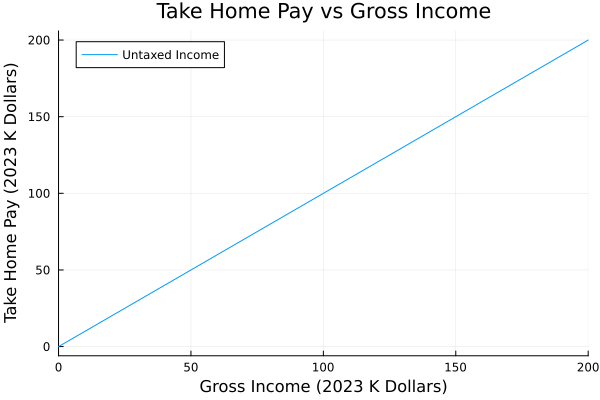

In [2]:
const uspop = 336e6 # as of 2023


function plotthinc()
    p = plot(x -> x; title="Take Home Pay vs Gross Income",xlab="Gross Income (2023 K Dollars)",ylab="Take Home Pay (2023 K Dollars)",legend=true,label="Untaxed Income",xlim=(0,200))
end


plotthinc()

## How flat tax plus UBI works

Our government needs some money to run, we can all argue for our favorite level of government funding, but as of recently, according to information [available at Wikipedia](https://en.wikipedia.org/wiki/United_States_federal_budget) based on official government data, the 2022 Federal spending was $6.3 Trillion and Federal total revenues is $4.9 Trillion. 

It's useful to think about those numbers in terms of a fraction of GDP. Historically revenue has been on average about 17.4% of GDP and spending has been on average 21% of GDP. Let's argue later about how to adjust federal **spending**, instead we will simply add to all of this a Federal **transfer** which purely collects money from everyone according to the tax code, and returns it to the people in the form of a fixed monthly payment to everyone... that is the UBI.

It should be noted that this is not a form of "spending" per se. No scarce resources are consumed by this activity, the way they are when the government uses asphalt and labor to make roads or concrete, wood, and labor to build buildings or labor and building occupancy to operate court systems or gasoline and vehicles and labor to operate police forces. Instead the UBI redistributes financial resources nearly costlessly (we can ignore a few dollars a year per person to maintain the information about which accounts to send the money to and to enact the computer systems that implement the bank transfers).

**Economically speaking, UBI is not spending, but rather pure transfer**

Let's see on our graph what it looks like to use a flat tax to generate 17.4% of GDP to operate the government (we assume the GDP equals the sum of all income, this is a minor inaccuracy as not all forms of GDP income are considered "taxable income" but for simplicity purposes we ignore this difference until a bit later, we'll have to modify the tax rate to account for this below)

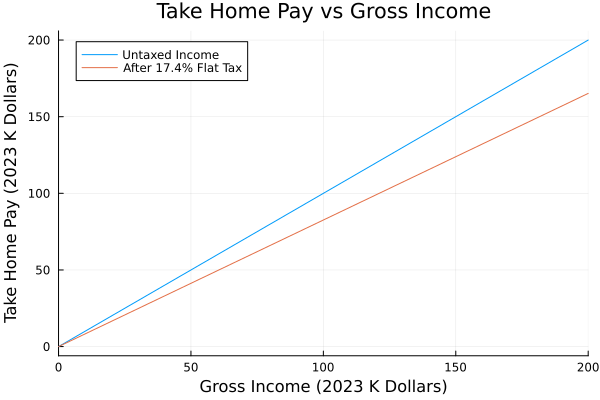

In [3]:
p = plotthinc();
p = plot!(x -> x * (1.0 - 0.174); label="After 17.4% Flat Tax")

As we can see in the above graph, after taking out taxes at an equal percentage for each person everyone's income is lower, including people who already had very low income on the left side of our graph. This isn't what our tax code today actually does. Later we'll use IRS data to approximate what our tax code actually does, but let's take a next step. Let's create a UBI which is about 10% of GDP/capita. [Today's GDP](https://fred.stlouisfed.org/series/A939RC0Q052SBEA) is about $82,000 per person per year, so we will be paying $8300 per person per year in UBI, and we will need to take about 10% more in tax. 

Of course the amount of income a household will receive varies with the number of people in the household, let's plot for 1, 2, and 4 person households:


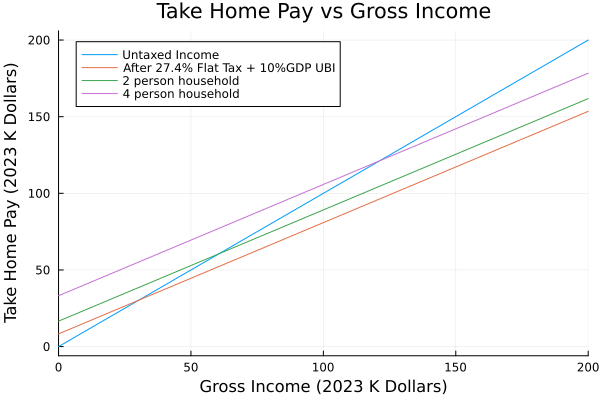

In [4]:
p = plotthinc();

p = plot!(x -> x*(1.0 - 0.174 - 0.1) + 8.3; label = "After 27.4% Flat Tax + 10%GDP UBI")
p = plot!(x -> x*(1.0 - 0.174 - 0.1) + 8.3*2; label = "2 person household")
p = plot!(x -> x*(1.0 - 0.174 - 0.1) + 8.3*4; label = "4 person household")


## Un-refined result

And now, really we should be done except to refine our exact calculation with breakdown of the revenue and outlays to refine our percentage tax. However, if this calculation were accurate, a single person household doesn't pay a dime in net taxes until they make more than $30k or so, a couple doesn't pay a dime in taxes until they make about $60k, and a family of 4 doesn't pay a dime until they make $120k. Not only that but the government gets the same net revenue to spend on its programs as it does today. Furthermore the 1040 tax form can consist of a couple of lines, and human resources and payroll departments can withhold by doing a single multiplication by 0.274 and the accuracy will be perfect, with no possibility of penalties for under withholding and entire complicated websites for calculating W4 forms and difficulty for people like professional musicians who get 18 W2 forms per year, or small business owners who have highly variable income from month to month or year to year.

Of course, you might ask, couldn't we help the poor even a little more, perhaps by making the take home income curve up a little according to a more "progressive" tax. It should be noted that the effective tax rate is already very progressive in the above scheme. For example, here is the tax paid (negative = net dollars received) as a fraction of Gross Income for a family of 4:

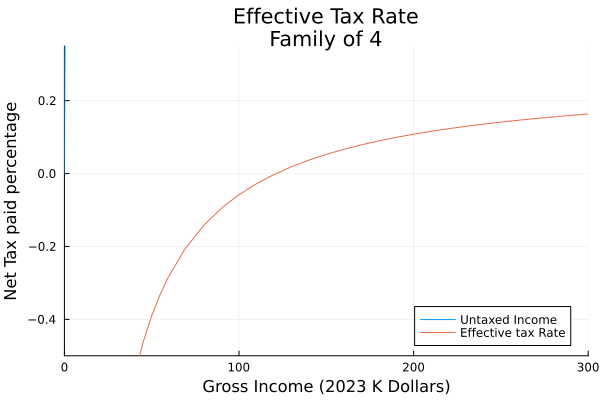

In [5]:
p = plotthinc();
p = plot!(x -> (x - ((x *(1.0 - .274) + 8.3*4)))/x; ylab="Net Tax paid percentage",ylim=(-.5,.35), title="Effective Tax Rate\nFamily of 4",
    label="Effective tax Rate",xlim=(0,300))


As we can see in the above graph, a family of 4 making $50k would be *receiving net* a total of about 40% additional income, whereas a family of 4 making $200k would be paying net about 10% in taxes.

How is this possible? **Isn't this too good to be true?** Well, let's look into the distribution of incomes in the US, according to the [Tax Policy Center](https://www.taxpolicycenter.org/statistics/household-income-quintiles) together with the number of households total [as reported by the Census](https://www.census.gov/quickfacts/fact/table/US/HSD410222) (125736353 households)

![IncomeQuintiles](imgs/IncomeQuintilesScreenshot.png)

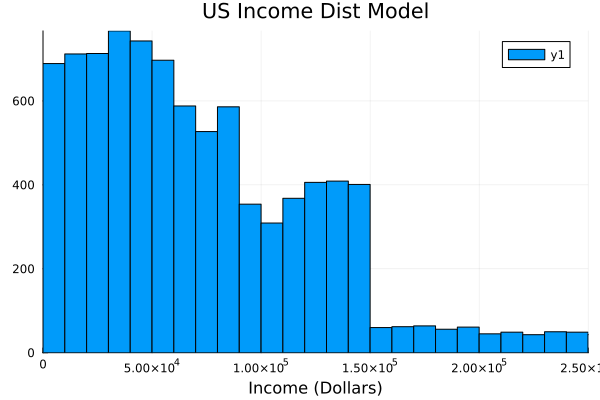

In [6]:
const nhous = 125736353.0
const currevenue = 3.8 # current revenue from income and payroll tax in trillions

incomequin = DataFrame(meaninc=map(Float64,[14859,41025,70879,115462,269356]),n=[.2,.2,.2,.2,.2])
incomequin.houses = incomequin.n*nhous

@df incomequin bar(:meaninc ./ 1000,:houses ./ 1e6, xlab="Income avg (dollars)",ylab="N Houses (millions)")


incDist = MixtureModel([Uniform(0,28e3),Uniform(28e3,55e3),Uniform(55e3,89.7e3),Uniform(89.7e3,149e3), Truncated(Exponential(269356),115e3,2e6)])

incsamp = rand(incDist,10000)
histogram(incsamp; xlim=(0,250e3),title="US Income Dist Model",xlab="Income (Dollars)")

As we can see there are 25 Million households who are in the top 20% of income, and their average income is about $270k. The total contribution to revenue for each household income block is given as:

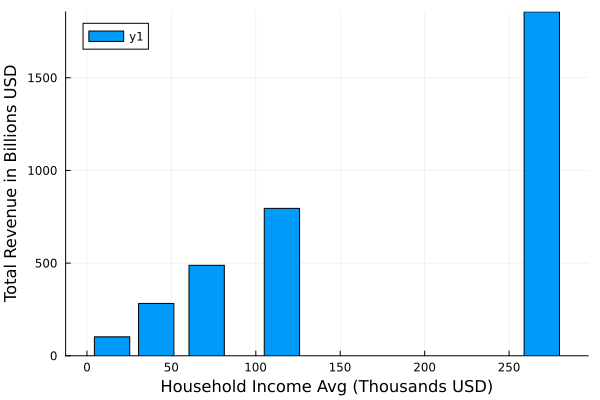

In [7]:
bar(incomequin.meaninc ./ 1000, 0.274 .* incomequin.meaninc * nhous * 0.2/1e9; ylab="Total Revenue in Billions USD",xlab="Household Income Avg (Thousands USD)")

We can calculate the total revenue, subtract the total UBI, and compare to the current govt revenue:

In [8]:
totrev = sum(0.274 .* incomequin.meaninc * nhous * 0.2/1e12)

3.524973240384297

## Refined Calculations And Comparison to "Optimal" tax curves


There's clearly something wrong with our back of the envelope calculations, we've assumed that household income is too big of a fraction of GDP, we're also being too approximate in our calculation. Here's the breakdown shown at the [Wikipedia summary of federal revenue](https://en.wikipedia.org/wiki/United_States_federal_budget#/media/File:2022_US_Federal_Revenues.png) and [Wikipedia summary of the federal outlays](https://en.wikipedia.org/wiki/United_States_federal_budget#/media/File:2022_US_Federal_Mandatory_Outlays.png)

We simplify and make the tax code more fair by combining individual income and payroll taxes into a single income tax system. So we need to replace this revenue:

Revenue For Replacement:

1) Individual Income Taxes = $2.632 Trillion
2) Payroll Taxes = $1.484 Trillion

Total Revenue: $4.116 Trillion


We can think of UBI as a little like "extending social security to everyone" which means that some of the money currently going to social security could be thought of as UBI we're already collecting and paying. We'll assume there's some additional amounts on top of the UBI needed for social security payments to the elderly above and beyond the UBI but half of the current social security outlays can be "converted to UBI". In addition, "income security" and "student loan programs" are also transfers to groups that will now be getting UBI instead, they can be simply converted in place.

Outlays of Interest:

1) Social Security = $1.213 Trillion
2) Income Security = $0.581 Trillion
3) Student Loan Programs = $0.482 Trillion

Total Outlays scheduled for partial replacement: $2.276 Trillion

Total UBI to pay: $2.789 Trillion

Additional revenue needed for UBI after conversion: 2.789 - .581 - .482 - 1.213/2 = 1.120 Trillion

So our new revenue stream must be $4.116 Trillion + 1.12 Trillion new revenue for UBI 

This means we need a total of **5.24 Trillion** from our taxes

Let's figure out our total household income, and solve for the percentage we need

In [9]:
revreqd = 4.116+1.12
tothhinc = sum(incomequin.meaninc * nhous * 0.2/1e12)
@printf("We need to use flat tax rate of: %.2f %%\n",revreqd/tothhinc*100)

We need to use flat tax rate of: 40.70 %


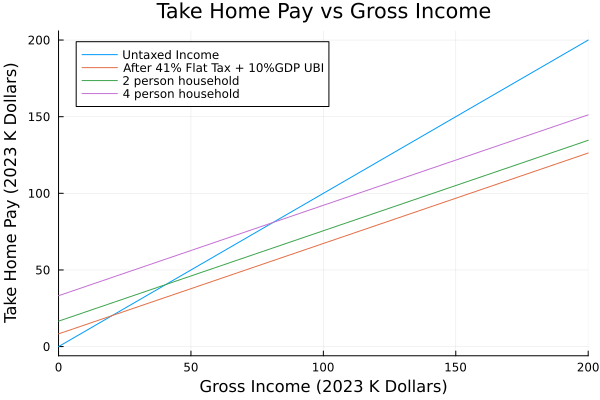

In [10]:
p = plotthinc();
flatrate = .41 # round off
p = plot!(x -> x*(1.0 - flatrate) + 8.3; label = @sprintf("After %.0f%% Flat Tax + 10%%GDP UBI",flatrate*100))
p = plot!(x -> x*(1.0 - flatrate) + 8.3*2; label = "2 person household")
p = plot!(x -> x*(1.0 - flatrate) + 8.3*4; label = "4 person household")


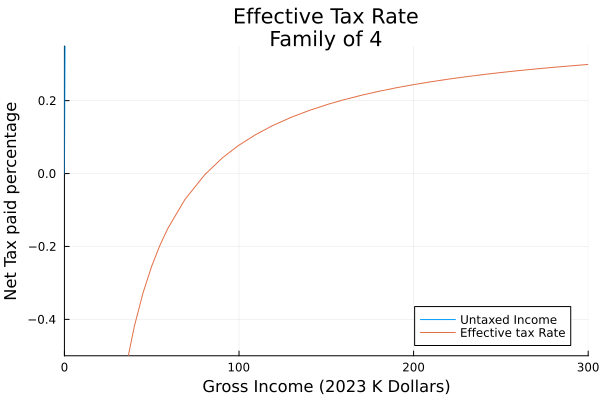

In [11]:
p = plotthinc();
p = plot!(x -> (x - ((x *(1.0 - flatrate) + 8.3*4)))/x; ylab="Net Tax paid percentage",ylim=(-.5,.35), title="Effective Tax Rate\nFamily of 4",
    label="Effective tax Rate",xlim=(0,300))


## Can we make this even more progressive?

Some people prefer more progressive tax systems. As can be seen above, the overall effective tax rate is negative for any family of 4 making less than about \\$80k and the effective tax rate climbs to only 22\% or so by \\$200k. So this "flat tax plus UBI" **is already** a very progressive tax system, in fact more progressive than todays tax system by far. But also substantially simpler and fairer.

Nevertheless, we could try to design a take-home curve instead of a line which maximizes some utility function describing what we prefer from a tax curve.

There are several constraints to our tax curve. The first is it needs to generate a total of $5.24 Trillion in taxes. The second is it needs to increase at every income level... It should never be the case the working for more pay results in **less** take home income. If that occurs then there is a strong financial incentive for people to not do more economically valuable jobs or invest in education to get skills to be able to earn more in the future. Although there are other reasons than just monetary for people to choose their work, if there are disincentives to participate in the economy everyone will ultimately lose out on a potentially bigger pie as some fraction of the people respond to those incentives and the amount of goods and services being produced shrinks as a result.

In addition it's really important to be able to incentivize people to do work in places they otherwise wouldn't choose or at times they otherwise wouldn't choose. For example, suppose a heart surgeon lives in Los Angeles and makes $350k a year. Suppose furthermore just for example, that all income above $350k is taxed at 100\% (the take home curve goes completely flat at this point). Now, Boise Idaho loses a heart surgeon to retirement or death in an automobile crash... There are thousands of people in Boise Idaho who need heart surgery and may die prematurely if they don't get it. A hospital tries to attract the surgeon from Los Angeles. But this surgeon must give up his home in LA, his friends in LA, his children's educational opportunities and their friends, have moving expenses, spend time to find a nice house to live in, and has many other expenses associated with moving to Boise. What can the hospital offer the surgeon? Well, there are thousands of people each needing heart surgery in Boise so maybe it's worth well over $1M/yr to Boise to get a heart surgeon to move there. But what does the surgeon get out of it? At his new income of $1M his *take home* income is no higher at all than it currently is in LA. He loses all the social value he's accumulated in LA and has no financial incentive at all to move. It is extremely unlikely this person will choose to move. So take-home income can never be flat, at least for any nontrivial number of middle or upper middle class productive working people. One could imagine that income derived purely from being the inherited owner of a thing might be taxable at 100\% without actual cost to society, but income derived from heart surgery or engineering design or construction of infrastructure or teaching or similar activities must always have a take-home curve that slopes upwards sufficiently that we can incentivize people to do those tasks in places they otherwise wouldn't.

Finally, we require that the take-home curve starts at our UBI value at the far end. A family with no present income still gets at least the UBI for each member. This is what it means to be a UBI... that the income at zero earned income is a positive quantity and every earned income dollar increases your take home above that.

In order to assess the curve we need a sample of households. It's no longer good enough to work with the summary average of each of the quintiles of income because the curve is nonlinear. Unfortunately we don't have easy access to a sample of Adjusted Gross Income of US households (though perhaps we can find one somewhere). So we'll try to synthesize one from information about the quantiles listed above.

The problem then is to maximize the utility of the after tax take-home curve subject to the constraint that it goes through (0,UBI), has a positive slope everywhere, and generates a total of $5.24 T revenue.

The Utility we'll use is to maximize the mean take home income plus a boost to utility for the mean slope across the population of household incomes. We'll assume an "average" household size, so the size of the UBI is the size needed for an average number of household people. We'll make that a slider you can adjust.

To impose the requirement of always sloping upward we'll calculate the mean of $exp(-20*dy/dt)$ and put a maximum upper bound on it (this quantity is near zero for upward sloping locations, but goes positive rapidly for every downward sloping location on the curve).

We will also compare the curve generated to a flat tax that produces the same revenue and has the same UBI

In [14]:
function gini(incs)

    sam = view(incs,1:100)
    mad = mean(abs(i-j) for i in sam, j in sam)
    gini = mad/(2*mean(sam))
end


function coefstofun(u,p)
    spc = Chebyshev(0.0..2_000_000.0)
    fsqt = Fun(spc,u)
#    df = fsqt*fsqt
    df = fsqt
    fI = Integral() * df
    ffI = fI - fI(0.0) + p.min
    return ffI,df
end

function fitness(u,p)
    fI,df = coefstofun(u,p)
    incomes = p.incs
    
    meaninc = mean(fI(i) for i in incomes)
    meanmarg = mean(df(i) for i in incomes)
    fitness = -(meaninc/p.gdppc + p.k * meanmarg)
end

function revconstr(constr, u,p) ## we need a certain revenue
    target = p.revneeded # in trillions
    fI,df = coefstofun(u,p)
    revactual = mean(i - fI(i) for i in p.incs ) * (nhous / 1e12) 
    constr[1] = revactual - target 
    return constr[1]
end

function revderivconstr(constr,u,p)
    target = p.revneeded
    incs = p.incs
    fI,df = coefstofun(u,p)
    revactual = mean(i-fI(i) for i in incs) * (nhous/1e12)
    constr[1] = revactual - target
    mind = mean(exp(-20*df(i)) for i in incs)
    constr[2] = mind
    return constr
end

let 
    u0 = rand(Normal(0.0,0.0001),7) .+ [.6; zeros(6)]

@manipulate for min=slider(0.01:.01:.35,val=0.18,label="UBI value (%GDP)"), k=slider(0.0:0.005:0.1,value=0.01,label="Value for pos slope"), margpen = slider(2.0:.1:25.0,value=10.0,label="Penalty Neg Slope")
    gdpc = mean(incsamp)
    parms = (k=k,min=min*gdpc,incs=incsamp,revneeded=currevenue,gdppc=gdpc)
    tax = (currevenue + min*gdpc*nhous/1e12) / (gdpc * nhous/1e12) ## flat tax amount
    u0 = [1.0- 1.03*tax,0.01,0.01,0.0,0.0,0.0,0.0]
    earn = collect(0.0:1000.0:1000000.0)
    p1 = plot(earn,earn,xlim=(0.0,400e3),ylim=(0.0,400e3),label="y = x visual reference",xlab="Earned Income (Dollars)", ylab="Take Home Income (Dollars)")
    p1 = plot!(earn,[min*gdpc + e*(1.0-tax) for e in earn],label="flat tax+UBI")
    opprob = OptimizationProblem(OptimizationFunction(fitness,Optimization.AutoForwardDiff(),cons=revderivconstr),
            u0,parms, 
            lcons=[0.0,0.0],ucons=[0.0,exp(-margpen)])
    sol = solve(opprob,Ipopt.Optimizer(); max_wall_time=35.0, print_level=0,output_file="optim.out")
#    println(sol)
    revcon=[0.0, 0.0]
    revderivconstr(revcon,sol.u,parms)
    #u0 = sol.u .+ rand(Normal(0.0,.04),7)
#    println("Revenue constraint: $(revcon[1])")
#    println("Deriv constraint: $(revcon[2])")
    fI,df = coefstofun(sol.u,parms)
    p1 = plot!(earn,[fI(e) for e in earn],label="Optimal Tax Curve")
    maxmarg = maximum(1-df(i) for i in incsamp)
    p1 = annotate!(50000.0,300e3,text(@sprintf("Flat tax amount = %.3f\nMax curve marginal tax = %.3f",tax,maxmarg),pointsize=9,halign=:left))

    afttax = fI.(incsamp)
    p2 = histogram(incsamp;alpha=0.25,bins=500,label="Raw Incomes",normalize=true)
    p2 = histogram!(afttax; alpha=0.80,xlim=(0.0,400e3),bins=500,label="After Tax",normalize=true)
    p2 = annotate!(200e3,6e-6,text(@sprintf("Before Tax Gini = %.3f",gini(incsamp))))
    p2 = annotate!(200e3,5e-6,text(@sprintf("After Tax Gini = %.3f",gini(afttax))))
    plot(p1,p2; layout=(2,1),size=(900,900))
end

end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["UBI value (%GDP)"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 35, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :val => 0.18, :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(18), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/home/dlakelan/.julia/packages/Knockout/HReiN/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/dlakelan/.julia/packages/Knockout/HReiN/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/dlakelan/.julia/packages/InteractBase/LJXv3/src/../assets/all.js"), Asset("css", nothing, "/home/dlakelan/.julia/packages/InteractBase/LJXv3/src/../assets/style.css"), Asset("css", nothing, "/home/dlakelan/.julia/packages/Interact/PENUy/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x00007fa5bf242590, Task (runnable) @0x00007fa5bf242590), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 0, 433113916828)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\"

# Results of Optimization

You can play with the above sliders and see that most of the value of optimizing the tax curve comes already from a flat tax and UBI together. 

Leave the other settings at their default, and compare the curve with the following settings:
1) UBI value = 0.14
2) UBI value = 0.24

Which of these two produces a better outcome for poor families? The increase in UBI has a much more beneficial effect on the poor than any "curvature" or "progressiveness" in the tax code. In fact, the primary benefit from curving the tax code comes as a benefit to the **upper middle class** in the \$100-300k range.

Making it so that people take home at least some minimum amount, which is **more** than they earn is already a **huge** progressive benefit for the poor. Adding a curved take home relationship which could let them keep more of each marginal dollar they earn as well does very little for anyone in the poorer range since the "optimal" curve can not curve much in this range anyway, and the effect of a strongly increasing curve in that range is to be equivalent to a higher UBI anyway. We get that benefit to the poor by just increasing the UBI.

Mathematically, part of the reason is that if the curve goes up sharply for small incomes, it must flatten out in order to produce enough tax revenue. This harms the curves "fitness" because the economy does better when people have ways to increase their income through finding better earnings potential opportunities. Flat curves mean extremely large marginal tax rates that affect everyday working class people (ie. marginal rates in the range of say 80-90\% for incomes in the range say $50k to 200k) and that will definitely affect peoples options to grow and the overall output of the economy as people retract their economic output.

We can lift people out of poverty by taxing the wealthy and giving a UBI, but we gain almost nothing by doing it with anything more complicated than a simple flat tax plus UBI, which is **more progressive** than our current progressive tax code.
